In [1]:
import tensorflow as tf

a = tf.constant(1, name='a')
b = tf.constant(2, name='b')
c = tf.constant(3, name='c')
z = 2 * (a - b) + c
tf.print(f'Result: z = {z}')

Result: z = 1


In [2]:
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

In [3]:
tf.print(f'Scalar Inputs: {compute_z(1, 2, 3)}')

Scalar Inputs: 1


In [4]:
tf.print(f'Rank 1 Inputs: {compute_z([1], [2], [3])}')

Rank 1 Inputs: [1]


In [5]:
tf.print(f'Rank 2 Inputs: {compute_z([[1], [4]], [[2], [5]], [[3], [6]])}')

Rank 2 Inputs: [[1]
 [4]]


In [6]:
@tf.function
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

In [7]:
tf.print(f'Scalar Inputs: {compute_z(1, 2, 3)}')
tf.print(f'Rank 1 Inputs: {compute_z([1], [2], [3])}')
tf.print(f'Rank 2 Inputs:\n{compute_z([[1], [4]], [[2], [5]], [[3], [6]])}')

Scalar Inputs: 1
Rank 1 Inputs: [1]
Rank 2 Inputs:
[[1]
 [4]]


In [8]:
@tf.function(
    input_signature=(
        tf.TensorSpec(shape=[None], dtype=tf.int32),
        tf.TensorSpec(shape=[None], dtype=tf.int32),
        tf.TensorSpec(shape=[None], dtype=tf.int32)
    )
)
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

In [9]:
tf.print(f'Rank 1 Inputs: {compute_z([1, 4, 7], [2, 5, 8], [3, 6, 9])}')

Rank 1 Inputs: [1 4 7]


In [10]:
## tf.print(f'Scalar Inputs: {compute_z(1, 2, 3)}')

In [11]:
a = tf.Variable(initial_value=3.14, name='var_a')
a

<tf.Variable 'var_a:0' shape=() dtype=float32, numpy=3.14>

In [12]:
b = tf.Variable(initial_value=[1, 2, 3], name='var_b')
b

<tf.Variable 'var_b:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3])>

In [13]:
c = tf.Variable(initial_value=[True, False])
c

<tf.Variable 'Variable:0' shape=(2,) dtype=bool, numpy=array([ True, False])>

In [14]:
d = tf.Variable(initial_value=['aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa'])
d

<tf.Variable 'Variable:0' shape=(1,) dtype=string, numpy=array([b'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa'], dtype=object)>

In [15]:
w = tf.Variable([1, 1, 4], trainable=False)
w.trainable

False

In [16]:
w

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 1, 4])>

In [17]:
w.assign([3, 1, 4], read_value=True)

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([3, 1, 4])>

In [18]:
w.assign_add([2, -1, 2], read_value=False)

In [19]:
w

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([5, 0, 6])>

In [20]:
tf.random.set_seed(1)
init = tf.keras.initializers.GlorotNormal()
tf.print(init(shape=(3, )))

[-0.722795904 1.01456821 0.251808226]


In [21]:
v = tf.Variable(init(shape=(2, 3)))
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 0.28982234, -0.7822928 , -0.0453659 ],
       [ 0.9609914 , -0.12000345,  0.7085282 ]], dtype=float32)>

In [22]:
class MyModule(tf.Module):
    def __init__(self):
        init = tf.keras.initializers.GlorotNormal()
        self.w1 = tf.Variable(init(shape=(2,3)), trainable=True)
        self.w2 = tf.Variable(init(shape=(1,2)), trainable=False)
        
m = MyModule()
print(f'All module variables: {[v.shape for v in m.variables]}')
print(f'Trainable variables: {[v.shape for v in m.trainable_variables]}')

All module variables: [TensorShape([2, 3]), TensorShape([1, 2])]
Trainable variables: [TensorShape([2, 3])]


In [23]:
tf.random.set_seed(1)
w = tf.Variable(tf.random.uniform((3, 3)))
w

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[0.16513085, 0.9014813 , 0.6309742 ],
       [0.4345461 , 0.29193902, 0.64250207],
       [0.9757855 , 0.43509948, 0.6601019 ]], dtype=float32)>

In [24]:
@tf.function
def compute_z(x):
    return tf.matmul(w, x)

x = tf.constant([[1], [2], [3]], dtype=tf.float32)
compute_z(x)

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[3.8610158],
       [2.9459305],
       [3.8262901]], dtype=float32)>

## GradientTape

In [25]:
w = tf.Variable(1.0)
b = tf.Variable(0.5)
w.trainable, b.trainable

(True, True)

In [26]:
x = tf.convert_to_tensor([1.4])
y = tf.convert_to_tensor([2.1])

with tf.GradientTape() as tape:
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))

dloss_dw = tape.gradient(loss, w)    
tf.print(f'dL/dw: {dloss_dw}')

dL/dw: -0.5599997639656067


In [27]:
with tf.GradientTape() as tape:
    tape.watch(x)
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))
    
dloss_dx = tape.gradient(loss, x)
tf.print(f'dL/dx: {dloss_dx}')

dL/dx: [-0.39999986]


In [28]:
with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))
    
dloss_dw = tape.gradient(loss, w)    
tf.print(f'dL/dw: {dloss_dw}')

dloss_dx = tape.gradient(loss, x)
tf.print(f'dL/dx: {dloss_dx}')

dloss_db = tape.gradient(loss, b)
tf.print(f'dL/db: {dloss_db}')

dL/dw: -0.5599997639656067
dL/dx: [-0.39999986]
dL/db: -0.39999985694885254


In [29]:
optimizer = tf.keras.optimizers.SGD()
optimizer.apply_gradients(zip([dloss_dw, dloss_db], [w, b]))

tf.print('Updated w:', w)
tf.print('Updated b:', b)

Updated w: 1.0056
Updated b: 0.504


## Keras API

In [30]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.build(input_shape=(None, 4))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


In [31]:
for v in model.variables:
    print(f'{v.name:20} {v.trainable} {v.shape}')

dense/kernel:0       True (4, 16)
dense/bias:0         True (16,)
dense_1/kernel:0     True (16, 32)
dense_1/bias:0       True (32,)


In [32]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(
    units=16,
    activation='relu',
    kernel_initializer=tf.keras.initializers.glorot_uniform(),
    bias_initializer=tf.keras.initializers.Constant(2.0)
))
model.add(tf.keras.layers.Dense(
    units=32,
    activation=tf.keras.activations.sigmoid,
    kernel_initializer=tf.keras.regularizers.l1
))

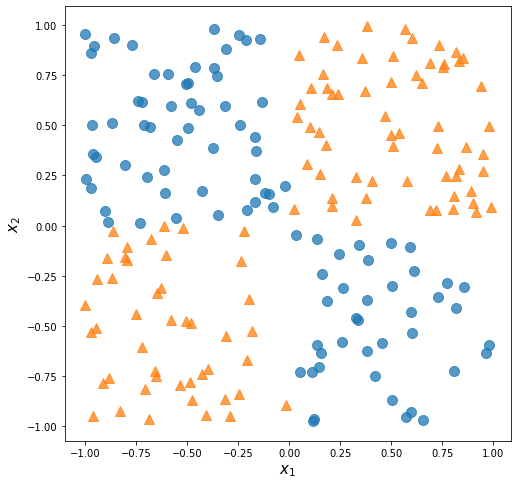

In [33]:
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(1)
np.random.seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1] < 0] = 0

x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]

fig = plt.figure(figsize=(8, 8))
plt.plot(x[y == 0, 0], x[y == 0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y == 1, 0], x[y == 1, 1], '^', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

In [34]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid, input_shape=(2, )))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)
hist = model.fit(
    x_train,
    y_train,
    validation_data=(x_valid, y_valid),
    epochs=200,
    batch_size=2,
    verbose=0
)

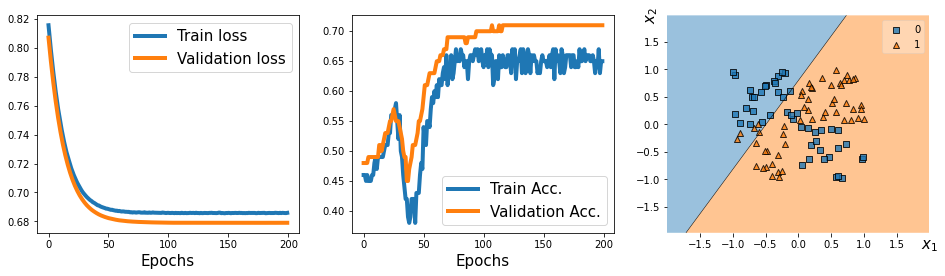

In [36]:
from mlxtend.plotting import plot_decision_regions

history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.dtype(np.int_)), clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [37]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu, input_shape=(2, )))
model.add(tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)
hist = model.fit(
    x_train,
    y_train,
    validation_data=(x_valid, y_valid),
    epochs=200,
    batch_size=2,
    verbose=0
)

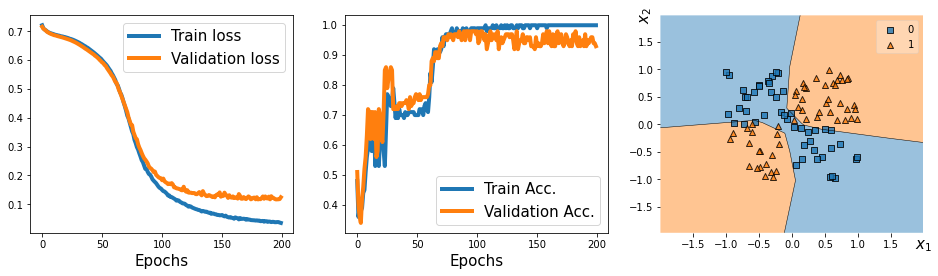

In [39]:
history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.dtype(np.int_)), clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [40]:
tf.random.set_seed(1)

inputs = tf.keras.Input(shape=(2, ))

h1 = tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu)(inputs)
h2 = tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu)(h1)
h3 = tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu)(h2)

outputs = tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid)(h3)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)
hist = model.fit(
    x_train,
    y_train,
    validation_data=(x_valid, y_valid),
    epochs=200,
    batch_size=2,
    verbose=0
)

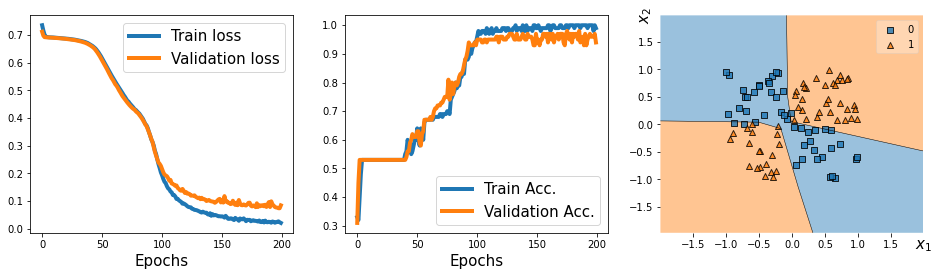

In [42]:
history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.dtype(np.int_)), clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [43]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.hidden_1 = tf.keras.layers.Dense(units=4, activation='relu')
        self.hidden_2 = tf.keras.layers.Dense(units=4, activation='relu')
        self.hidden_3 = tf.keras.layers.Dense(units=4, activation='relu')
        self.output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')
        
    def call(self, inputs):
        h = self.hidden_1(inputs)
        h = self.hidden_2(h)
        h = self.hidden_3(h)
        return self.output_layer(h)

In [44]:
tf.random.set_seed(1)

model = MyModel()
model.build(input_shape=(None, 2))
model.summary()

model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)
hist = model.fit(
    x_train,
    y_train,
    validation_data=(x_valid, y_valid),
    epochs=200,
    batch_size=2,
    verbose=0
)

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             multiple                  12        
_________________________________________________________________
dense_14 (Dense)             multiple                  20        
_________________________________________________________________
dense_15 (Dense)             multiple                  20        
_________________________________________________________________
dense_16 (Dense)             multiple                  5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


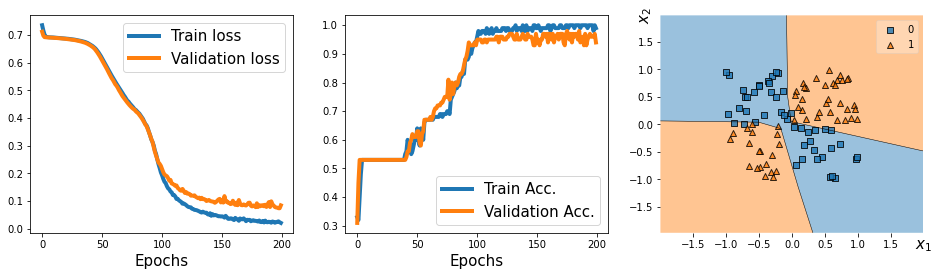

In [45]:
history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.dtype(np.int_)), clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [46]:
class NoisyLinear(tf.keras.layers.Layer):
    def __init__(self, output_dim, noise_stddev=0.1, **kwargs):
        self.output_dim = output_dim
        self.noise_stddev = noise_stddev
        super(NoisyLinear, self).__init__(**kwargs)

    def build(self, input_shape):
        self.w = self.add_weight(name='weights',
                                 shape=(input_shape[1], self.output_dim),
                                 initializer='random_normal',
                                 trainable=True)
        
        self.b = self.add_weight(shape=(self.output_dim,),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs, training=False):
        if training:
            batch = tf.shape(inputs)[0]
            dim = tf.shape(inputs)[1]
            noise = tf.random.normal(shape=(batch, dim),
                                     mean=0.0,
                                     stddev=self.noise_stddev)

            noisy_inputs = tf.add(inputs, noise)
        else:
            noisy_inputs = inputs
        z = tf.matmul(noisy_inputs, self.w) + self.b
        return tf.keras.activations.relu(z)
    
    def get_config(self):
        config = super(NoisyLinear, self).get_config()
        config.update({'output_dim': self.output_dim,
                       'noise_stddev': self.noise_stddev})
        return config

In [47]:
tf.random.set_seed(1)

noisy_layer = NoisyLinear(4)
noisy_layer.build(input_shape=(None, 4))
x = tf.zeros(shape=(1, 4))
tf.print(noisy_layer(x, training=True))

config = noisy_layer.get_config()
new_layer = NoisyLinear.from_config(config)
tf.print(new_layer(x, training=True))

[[0 0.00821428 0 0]]
[[0 0.0108502861 0 0]]


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
noisy_linear_1 (NoisyLinear) (None, 4)                 12        
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 20        
________________________________________________

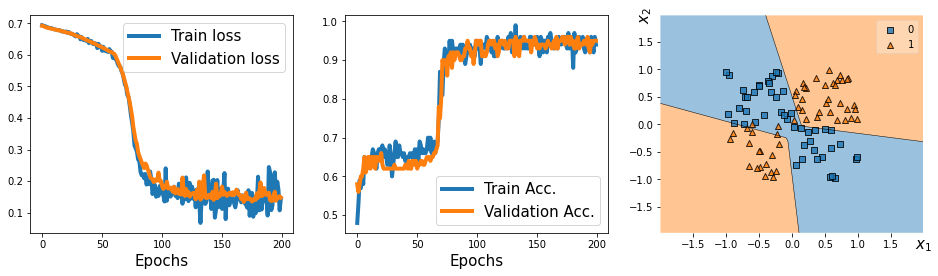

In [48]:
tf.random.set_seed(1)

model = tf.keras.Sequential([
    NoisyLinear(4, noise_stddev=0.1),
    tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid),
])
model.build(input_shape=(None, 2))
model.summary()

model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)
hist = model.fit(
    x_train,
    y_train,
    validation_data=(x_valid, y_valid),
    epochs=200,
    batch_size=2,
    verbose=0
)

history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.dtype(np.int_)), clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

## TensorFlow Estimator